### Wyoming opioid risk modeling 
Normal adjacency matrix - Dimentions would be different.

{'DC': ['EP_MUNIT', 'EP_DISABL', 'EP_MINRTY', 'EP_AGE65', 'EP_CROWD'], 'TN': ['EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV'], 'WY': ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR']}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle as pickle
from pylab import *
%matplotlib inline

import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
wySviHepVuRaw = gpd.read_file('./data/processed data/SVI2018 WY counties with death rate HepVu/SVI2018_WY_counties_with_death_rate_HepVu.shp')

##### Filtering the raw variables with overdose death rate

In [3]:
selectedVariables = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ','NOD_Rate']

In [4]:
selectedVariablesWithoutY = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [5]:
selectedVariablesWy = ['FIPS','EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR','geometry']

In [6]:
selectedVariablesWy_ = ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR']

#### Check the distribution of each selected variable

In [7]:
wySviHepVuRaw[selectedVariablesWy_].describe()

,EP_DISABL,EP_PCI,EP_LIMENG,EP_CROWD,EP_UNINSUR
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,13.456522,31455.086957,0.843478,2.126087,11.947826
std,2.638840,5915.914898,0.964754,1.470070,2.699810
min,7.000000,22688.000000,0.000000,0.300000,7.400000
25%,12.050000,27668.500000,0.300000,1.250000,10.000000
50%,14.200000,32069.000000,0.700000,1.900000,12.000000
75%,15.100000,33156.500000,0.850000,2.550000,13.450000
max,17.500000,53703.000000,4.300000,7.200000,18.000000


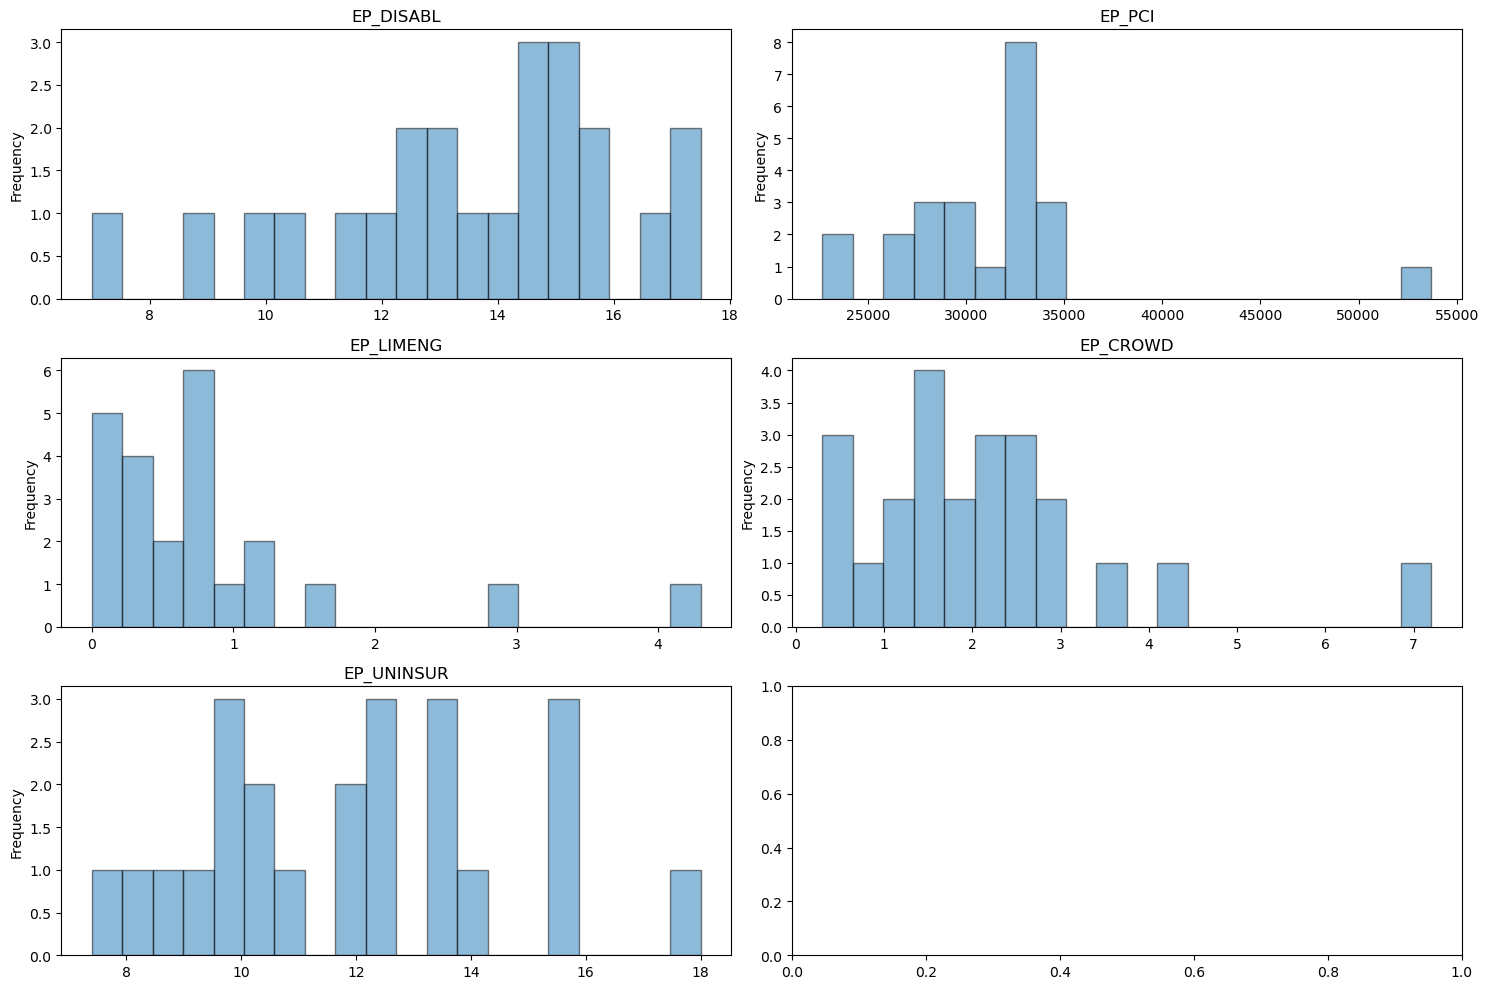

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for i, ax in zip(selectedVariablesWy_, axes.flatten()):
    wySviHepVuRaw[i].plot.hist(bins=20, alpha=0.5, ax=ax, edgecolor='black')
    ax.set_title(i, fontsize=12)  # Adjust the fontsize here

plt.tight_layout()
plt.show()


#### Get number of rows below and above mean

In [9]:
# EP_DISABL
epDisabl_mean = wySviHepVuRaw['EP_DISABL'].mean()
epDisabl_sd = wySviHepVuRaw['EP_DISABL'].std()

# EP_PCI 
epPci_mean = wySviHepVuRaw['EP_PCI'].mean()
epPci_sd = wySviHepVuRaw['EP_PCI'].std()

# EP_LIMENG
epLimeng_mean = wySviHepVuRaw['EP_LIMENG'].mean()
epLimeng_sd = wySviHepVuRaw['EP_LIMENG'].std()

# EP_CROWD
epCrowd_mean = wySviHepVuRaw['EP_CROWD'].mean()
epCrowd_sd = wySviHepVuRaw['EP_CROWD'].std()

# EP_UNINSUR
epUninsur_mean = wySviHepVuRaw['EP_UNINSUR'].mean()
epUninsur_sd = wySviHepVuRaw['EP_UNINSUR'].std()



In [10]:
# for each selected vcariable wy calculate the number of rows that are within 1, 2 standard deviations from the mean
# EP_DISABL
epDisabl_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] >= epDisabl_mean - epDisabl_sd) & (wySviHepVuRaw['EP_DISABL'] <= epDisabl_mean + epDisabl_sd)].shape[0]
epDisabl_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] >= epDisabl_mean - 2*epDisabl_sd) & (wySviHepVuRaw['EP_DISABL'] <= epDisabl_mean + 2*epDisabl_sd)].shape[0]

# EP_PCI
epPci_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] >= epPci_mean - epPci_sd) & (wySviHepVuRaw['EP_PCI'] <= epPci_mean + epPci_sd)].shape[0]
epPci_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] >= epPci_mean - 2*epPci_sd) & (wySviHepVuRaw['EP_PCI'] <= epPci_mean + 2*epPci_sd)].shape[0]

# EP_LIMENG
epLimeng_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] >= epLimeng_mean - epLimeng_sd) & (wySviHepVuRaw['EP_LIMENG'] <= epLimeng_mean + epLimeng_sd)].shape[0]
epLimeng_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] >= epLimeng_mean - 2*epLimeng_sd) & (wySviHepVuRaw['EP_LIMENG'] <= epLimeng_mean + 2*epLimeng_sd)].shape[0]

# EP_CROWD
epCrowd_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] >= epCrowd_mean - epCrowd_sd) & (wySviHepVuRaw['EP_CROWD'] <= epCrowd_mean + epCrowd_sd)].shape[0]
epCrowd_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] >= epCrowd_mean - 2*epCrowd_sd) & (wySviHepVuRaw['EP_CROWD'] <= epCrowd_mean + 2*epCrowd_sd)].shape[0]

# EP_UNINSUR
epUninsur_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] >= epUninsur_mean - epUninsur_sd) & (wySviHepVuRaw['EP_UNINSUR'] <= epUninsur_mean + epUninsur_sd)].shape[0]
epUninsur_2sd = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] >= epUninsur_mean - 2*epUninsur_sd) & (wySviHepVuRaw['EP_UNINSUR'] <= epUninsur_mean + 2*epUninsur_sd)].shape[0]

# create a dataframe with the results
data = {'Variable': ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR'], 'Mean': [epDisabl_mean, epPci_mean, epLimeng_mean, epCrowd_mean, epUninsur_mean], 'Standard Deviation': [epDisabl_sd, epPci_sd, epLimeng_sd, epCrowd_sd, epUninsur_sd], 'Within 1 SD': [epDisabl_1sd, epPci_1sd, epLimeng_1sd, epCrowd_1sd, epUninsur_1sd], 'Within 2 SD': [epDisabl_2sd, epPci_2sd, epLimeng_2sd, epCrowd_2sd, epUninsur_2sd]}
df = pd.DataFrame(data)
df

,Variable,Mean,Standard Deviation,Within 1 SD,Within 2 SD
0,EP_DISABL,13.456522,2.638840,16,22
1,EP_PCI,31455.086957,5915.914898,20,22
2,EP_LIMENG,0.843478,0.964754,21,21
3,EP_CROWD,2.126087,1.470070,18,22
4,EP_UNINSUR,11.947826,2.699810,16,22


In [11]:
# for each selected vcariable wy calculate the number of rows that are below 1 standard deviation from the mean and rows below mean and above 1 standard deviation
# EP_DISABL
epDisabl_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] < epDisabl_mean - epDisabl_sd)].shape[0]
epDisabl_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] < epDisabl_mean)].shape[0]
epDisabl_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_DISABL'] < epDisabl_mean + epDisabl_sd)].shape[0]

# EP_PCI
epPci_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] < epPci_mean - epPci_sd)].shape[0]
epPci_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] < epPci_mean)].shape[0]
epPci_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_PCI'] < epPci_mean + epPci_sd)].shape[0]

# EP_LIMENG
epLimeng_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] < epLimeng_mean - epLimeng_sd)].shape[0]
epLimeng_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] < epLimeng_mean)].shape[0]
epLimeng_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_LIMENG'] < epLimeng_mean + epLimeng_sd)].shape[0]

# EP_CROWD
epCrowd_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] < epCrowd_mean - epCrowd_sd)].shape[0]
epCrowd_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] < epCrowd_mean)].shape[0]
epCrowd_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_CROWD'] < epCrowd_mean + epCrowd_sd)].shape[0]

# EP_UNINSUR
epUninsur_below_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] < epUninsur_mean - epUninsur_sd)].shape[0]
epUninsur_below_mean = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] < epUninsur_mean)].shape[0]
epUninsur_below_mean_plus_1sd = wySviHepVuRaw[(wySviHepVuRaw['EP_UNINSUR'] < epUninsur_mean + epUninsur_sd)].shape[0]

# create a dataframe with the results
data = {'Variable': ['EP_DISABL', 'EP_PCI', 'EP_LIMENG', 'EP_CROWD', 'EP_UNINSUR'], 'Below Mean-1 SD': [epDisabl_below_1sd, epPci_below_1sd, epLimeng_below_1sd, epCrowd_below_1sd, epUninsur_below_1sd], 'Below Mean': [epDisabl_below_mean, epPci_below_mean, epLimeng_below_mean, epCrowd_below_mean, epUninsur_below_mean], 'Below Mean + 1 SD': [epDisabl_below_mean_plus_1sd, epPci_below_mean_plus_1sd, epLimeng_below_mean_plus_1sd, epCrowd_below_mean_plus_1sd, epUninsur_below_mean_plus_1sd]}
df = pd.DataFrame(data)
df

,Variable,Below Mean-1 SD,Below Mean,Below Mean + 1 SD
0,EP_DISABL,4,11,20
1,EP_PCI,2,10,22
2,EP_LIMENG,0,17,21
3,EP_CROWD,3,12,21
4,EP_UNINSUR,3,10,19


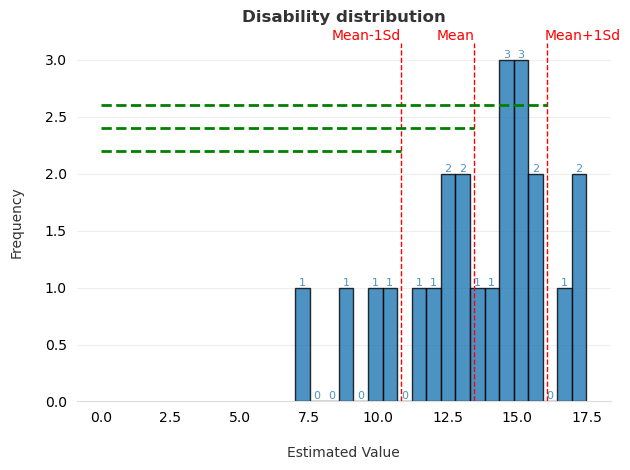

In [56]:
fig, ax = plt.subplots()
wySviHepVuRaw['EP_DISABL'].plot.hist(bins=20, alpha=0.8, ax=ax, edgecolor='black')

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
for bar in ax.patches:
    bar_value = int(bar.get_height())
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=ax.patches[0].get_facecolor(),
            size=8)
    
ax.axvline(wySviHepVuRaw['EP_DISABL'].mean() - wySviHepVuRaw['EP_DISABL'].std(), color='r', linestyle='dashed', linewidth=1)
ax.text(wySviHepVuRaw['EP_DISABL'].mean() - wySviHepVuRaw['EP_DISABL'].std(), ax.get_ylim()[1], 'Mean-1Sd', color='r', va='bottom', ha='right')


# mean
ax.axvline(wySviHepVuRaw['EP_DISABL'].mean(), color='r', linestyle='dashed', linewidth=1)
ax.text(wySviHepVuRaw['EP_DISABL'].mean(), ax.get_ylim()[1], 'Mean', color='r', va='bottom', ha='right')


ax.axvline(wySviHepVuRaw['EP_DISABL'].mean() + wySviHepVuRaw['EP_DISABL'].std(), color='r', linestyle='dashed', linewidth=1)
ax.text(wySviHepVuRaw['EP_DISABL'].mean() + 2*wySviHepVuRaw['EP_DISABL'].std(), ax.get_ylim()[1], 'Mean+1Sd', color='r', va='bottom', ha='right')


# axhline
ax.hlines(y=2.6, xmin=0, xmax=wySviHepVuRaw['EP_DISABL'].mean()+ wySviHepVuRaw['EP_DISABL'].std(), color='g', linestyle='dashed', linewidth=2)
ax.hlines(y=2.4, xmin=0, xmax=wySviHepVuRaw['EP_DISABL'].mean(), color='g', linestyle='dashed', linewidth=2)
ax.hlines(y=2.2, xmin=0, xmax=wySviHepVuRaw['EP_DISABL'].mean()- wySviHepVuRaw['EP_DISABL'].std(), color='g', linestyle='dashed', linewidth=2)


    
# Add labels and a title.
ax.set_xlabel('Estimated Value', labelpad=15, color='#333333')
ax.set_ylabel('Frequency', labelpad=15, color='#333333')
ax.set_title('Disability distribution', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

### Adjacency Method

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
from itertools import combinations
from scipy import spatial
import pickle as pickle
import gudhi
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import io
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageChops, ImageFont
import shapely.geometry as geom
from shapely.ops import unary_union
import warnings

import invr

In [ ]:
wyFiltered = wySviHepVuRaw[selectedVariablesWy]

In [ ]:
#reset index
wyFiltered = wyFiltered.reset_index(drop=True)

In [ ]:
wyFiltered.head(3)

In [ ]:
# get the uniques fips codes
fips = wyFiltered['FIPS'].unique()
fips

Generate adjacent counties

In [ ]:
def generate_adjacent_counties(dataframe,filtration_threshold,variable_name):
    filtered_df = dataframe[dataframe[variable_name] < filtration_threshold]

    # Perform a spatial join to find adjacent precincts
    adjacent_counties = gpd.sjoin(filtered_df, filtered_df, predicate='intersects', how='left')

    # Filter the results to include only the adjacent states
    adjacent_counties = adjacent_counties.query('sortedID_left != sortedID_right')

    # Group the resulting dataframe by the original precinct Name and create a list of adjacent precinct Name
    adjacent_counties = adjacent_counties.groupby('sortedID_left')['sortedID_right'].apply(list).reset_index()

    adjacent_counties.rename(columns={'sortedID_left': 'county', 'sortedID_right': 'adjacent'}, inplace=True)

    adjacencies_list = adjacent_counties['adjacent'].tolist()
    county_list = adjacent_counties['county'].tolist()

    merged_df = pd.merge(adjacent_counties, dataframe, left_on='county',right_on='sortedID', how='left')
    merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')

    return adjacencies_list,merged_df,county_list

In [ ]:
def form_simplicial_complex(adjacent_county_list,county_list):
    max_dimension = 3

    V = []
    V = invr.incremental_vr(V, adjacent_county_list, max_dimension,county_list)

    return V

In [ ]:
def fig2img(fig):
     #convert matplot fig to image and return it

     buf = io.BytesIO()
     fig.savefig(buf)
     buf.seek(0)
     img = Image.open(buf)
     return img

In [ ]:
def plot_simplicial_complex(dataframe,V):

    #city centroids
    city_coordinates = {city.sortedID: np.array((city.geometry.centroid.x, city.geometry.centroid.y)) for _, city in dataframe.iterrows()}

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_axis_off() 

    # Plot the "wyoming_svi" DataFrame
    dataframe.plot(ax=ax, edgecolor='black', linewidth=0.3, color="white")

    # Plot the centroid of the large square with values
    for i, row in dataframe.iterrows():
        centroid = row['geometry'].centroid
        # text_to_display = f"FIPS: {row['FIPS']}\nFilteration: {row['EP_SNGPNT']}"
        plt.text(centroid.x, centroid.y, str(row['FIPS']), fontsize=8, ha='center', color="black")
        # plt.text(centroid.x, centroid.y, text_to_display, fontsize=10, ha='center', color="black")

    for edge_or_traingle in V:

        
        if len(edge_or_traingle) == 2:
            # Plot an edge
            ax.plot(*zip(*[city_coordinates[vertex] for vertex in edge_or_traingle]), color='red', linewidth=2)
            # img = fig2img(fig)
            # list_gif.append(img)
        elif len(edge_or_traingle) == 3:
            # Plot a triangle
            ax.add_patch(plt.Polygon([city_coordinates[vertex] for vertex in edge_or_traingle], color='green', alpha=0.2))
            # img = fig2img(fig)
            # list_gif.append(img)
    plt.show()
    plt.close()

    #return list_gif #deleted  plot_simplicial_complex(dataframe,V,list_gif) --> list part

##### Multiple variable code starts here

In [ ]:
selected_variables_and_threshold = {'EP_DISABL': (epDisabl_mean-epDisabl_sd), 'EP_PCI': (epPci_mean-epPci_sd), 'EP_LIMENG': (epLimeng_mean-epLimeng_sd), 'EP_CROWD': (epCrowd_mean-epCrowd_sd), 'EP_UNINSUR': (epUninsur_mean-epUninsur_sd)}

In [ ]:
# create a empty dictionary
edges_and_traingles_for_each_variable_below_1sd = {}

In [ ]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = wyFiltered[['FIPS',variable_name, 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable = df_one_variable.sort_values(by=variable_name)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    # This is a new feature that I added to the code. It creates a new list replace the sorted ID with the FIPS on the V list
    # create a new list replace the sorted ID with the FIPS on the V list
    V_FIPS = [[df_one_variable.iloc[x]['FIPS'] for x in i] for i in V]
    
    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable_below_1sd[variable_name] = V_FIPS

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    print(f"Plotting simplicial complex for {variable_name} variable at threshold {threshold}")
    plot_simplicial_complex(df_one_variable,V)

In [ ]:
selected_variables_and_threshold = {'EP_DISABL': (epDisabl_mean), 'EP_PCI': (epPci_mean), 'EP_LIMENG': (epLimeng_mean), 'EP_CROWD': (epCrowd_mean), 'EP_UNINSUR': (epUninsur_mean)}
# create a empty dictionary
edges_and_traingles_for_each_variable_below_mean = {}

In [ ]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = wyFiltered[['FIPS',variable_name, 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable = df_one_variable.sort_values(by=variable_name)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    # This is a new feature that I added to the code. It creates a new list replace the sorted ID with the FIPS on the V list
    # create a new list replace the sorted ID with the FIPS on the V list
    V_FIPS = [[df_one_variable.iloc[x]['FIPS'] for x in i] for i in V]

    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable_below_mean[variable_name] = V_FIPS

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    print(f"Plotting simplicial complex for {variable_name} variable at threshold {threshold}")
    plot_simplicial_complex(df_one_variable,V)

In [ ]:
selected_variables_and_threshold = {'EP_DISABL': (epDisabl_mean+epDisabl_sd), 'EP_PCI': (epPci_mean+epPci_sd), 'EP_LIMENG': (epLimeng_mean+epLimeng_sd), 'EP_CROWD': (epCrowd_mean+epCrowd_sd), 'EP_UNINSUR': (epUninsur_mean+epUninsur_sd)}
# create a empty dictionary
edges_and_traingles_for_each_variable_below_mean_plus_1sd = {}

In [ ]:
for variable_name, threshold in selected_variables_and_threshold.items():

    # Sorting based on the variable and selecting only the FIPS and the variable columns is important
    # Also we need to keep  the dataframe sorted based on the variable

    df_one_variable = wyFiltered[['FIPS',variable_name, 'geometry']]

    # # Sorting the DataFrame based on the 'rate' column
    df_one_variable = df_one_variable.sort_values(by=variable_name)
    df_one_variable['sortedID'] = range(len(df_one_variable))

    # Convert the DataFrame to a GeoDataFrame
    df_one_variable = gpd.GeoDataFrame(df_one_variable, geometry='geometry')
    df_one_variable.crs = "EPSG:3395"  # This is a commonly used projected CRS

    adjacencies_list,adjacent_counties_df,county_list = generate_adjacent_counties(df_one_variable,threshold,variable_name)

    # create a dictionary adjacent_counties_df column county as key and column adjacent as value(to avoid NULL adjacencies error)
    adjacent_counties_dict = dict(zip(adjacent_counties_df['county'],adjacent_counties_df['adjacent']))

    # this take only counties that have adjacent counties
    county_list = adjacent_counties_df['county'].tolist()

    V = form_simplicial_complex(adjacent_counties_dict,county_list)

    # This is a new feature that I added to the code. It creates a new list replace the sorted ID with the FIPS on the V list
    # create a new list replace the sorted ID with the FIPS on the V list
    V_FIPS = [[df_one_variable.iloc[x]['FIPS'] for x in i] for i in V]

    #add V list to the edges_and_traingles_for_each_variable dictionary with the key as the variable name
    edges_and_traingles_for_each_variable_below_mean_plus_1sd[variable_name] = V_FIPS

    # # # store the list of images for each variable
    # # list_img = []

    # # plot the simplicial complex
    print(f"Plotting simplicial complex for {variable_name} variable at threshold {threshold}")
    plot_simplicial_complex(df_one_variable,V)

##### Create a matrix for the full region(without filtering)

In [ ]:
selectedRegionsEP_DISABL = []
selectedRegionsEP_PCI = []
selectedRegionsEP_LIMENG = []
selectedRegionsEP_CROWD = []
selectedRegionsEP_UNINSUR = []

In [ ]:
# loop through the dictionary and for each variable create a list of edges
for variable_name, V_FIPS in edges_and_traingles_for_each_variable_below_mean.items():
# for variable_name, V_FIPS in edges_and_traingles_for_each_variable_below_mean_plus_1sd.items():
    for set in V_FIPS:
        if len(set) == 2 or len(set) == 3:
            # if variable is EP_DISABL
            if variable_name == 'EP_DISABL':
                #check if the edge(both values) is not already in the list
                for vertice in set:
                    if vertice not in selectedRegionsEP_DISABL:
                        selectedRegionsEP_DISABL.append(vertice)
            elif variable_name == 'EP_PCI':
                for vertice in set:
                    if vertice not in selectedRegionsEP_PCI:
                        selectedRegionsEP_PCI.append(vertice)
            elif variable_name == 'EP_LIMENG':
                for vertice in set:
                    if vertice not in selectedRegionsEP_LIMENG:
                        selectedRegionsEP_LIMENG.append(vertice)
            elif variable_name == 'EP_CROWD':
                for vertice in set:
                    if vertice not in selectedRegionsEP_CROWD:
                        selectedRegionsEP_CROWD.append(vertice)
            elif variable_name == 'EP_UNINSUR':
                for vertice in set:
                    if vertice not in selectedRegionsEP_UNINSUR:
                        selectedRegionsEP_UNINSUR.append(vertice)
        


#### Create adjacency matrix from filtered regions
Matrix dimetions will be smaller

In [ ]:
from pysal.lib import weights
import pandas
from pysal.lib import weights

In [ ]:
#create a dictionary to store the selected regions and relevent Q Full matrix for each variable
selectedRegionsDic = {'EP_DISABL': [selectedRegionsEP_DISABL], 'EP_PCI': [selectedRegionsEP_PCI], 'EP_LIMENG': [selectedRegionsEP_LIMENG], 'EP_CROWD': [selectedRegionsEP_CROWD], 'EP_UNINSUR': [selectedRegionsEP_UNINSUR]}

In [ ]:
variableAndQmatrix = {}

In [ ]:
for variable_name, selectedSubRegions in selectedRegionsDic.items():
    # filter gdf dataframe to select few counties
    filteredSubRegionsDf = wyFiltered.loc[wyFiltered["FIPS"].isin(selectedSubRegions[0])]

    # lattice stored in a geo-table
    wq = weights.contiguity.Queen.from_dataframe(filteredSubRegionsDf)
    neighbors_q = wq.neighbors

    QTemp = pandas.DataFrame(*wq.full()).astype(int)
    QTemp = QTemp.multiply(-1)

    QTemp.index = filteredSubRegionsDf["FIPS"].values
    QTemp.columns = filteredSubRegionsDf["FIPS"].values

    # for each row in the fullMatrix dataframe sum the values in the row and take the absolute value and store in the diagonal
    for i in QTemp.index:
        QTemp.loc[i,i] = abs(QTemp.loc[i].sum())

    # append variable name and Q matrix to the dictionary
    variableAndQmatrix[variable_name] = [QTemp]

In [ ]:
# # save this dictionary to a pickle file
# with open('variableAndQmatrix.pickle', 'wb') as handle:
#     pickle.dump(variableAndQmatrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
variableAndQmatrix['EP_CROWD'][0].shape

#### Create Q scaled matrix(Marginal variances)

In [ ]:
from scipy.linalg import solve
from scipy.sparse.linalg import spsolve
import numpy as np

import scipy as sp

In [ ]:
scaling_factor = []

In [ ]:
for variable_name, Qmatrix in variableAndQmatrix.items():
    print(f"Variable: {variable_name}")
    print(f"Determinant of Q: {np.linalg.det(Qmatrix[0])}")

    Q = Qmatrix[0]
    # transform df to numpy array
    Q = Q.to_numpy()

    n = Qmatrix[0].shape[0]

    Q_jitter = Q + sp.sparse.diags(np.ones(n)) * max(Q.diagonal()) * np.sqrt(

        np.finfo(np.float64).eps

    )

    # inverse of precision (Q) is cov

    Q_perturbed = sp.sparse.csc_array(Q_jitter)

    b = sp.sparse.identity(n, format='csc')

    sigma = spsolve(Q_perturbed, b)


    # V \in Null(Q)

    V = np.ones(n)  # from pg. 6

    W = sigma @ V.T  # \Sigma * B in 3.17

    Q_inv = sigma - np.outer(W * solve(V @ W, np.ones(1)), W.T)

    # grabbing diag of cov gives var and

    # arithmetic mean in log-space becomes geometric mean after exp

    scaling = np.exp(np.sum(np.log(np.diag(Q_inv))) / n)

    scaling_factor.append(scaling)

    print(f"Scaling/GV: {scaling}")

    marginal_variances = np.diag(Q_inv/scaling)
    # print(f"Marginal Variances: {marginal_variances}")

    geometric_mean = np.exp(np.mean(np.log(marginal_variances)))
    print(f"Geometric Mean: {geometric_mean}")

    # print few break lines
    print("\n\n")

    # pring margianl variances with the FIPS
    print(f"Marginal Variances with FIPS: {list(zip(Qmatrix[0].index, marginal_variances))}")

    # print few break lines
    print("\n\n")

In [ ]:
# # create a dictionary to store the scaling factor and fullMatrix for each variable name as the key
# scalingFactorAndFullMatrix = {'EP_DISABL': [scaling_factor[0],fullMatrixEP_DISABL], 'EP_PCI': [scaling_factor[1],fullMatrixEP_PCI], 'EP_LIMENG': [scaling_factor[2],fullMatrixEP_LIMENG], 'EP_CROWD': [scaling_factor[3],fullMatrixEP_CROWD], 'EP_UNINSUR': [scaling_factor[4],fullMatrixEP_UNINSUR]}

In [ ]:
# logRisk = 0
# # multiply each full matrix by the scaling factor and sum all the matrices
# for variable_name, scalingFactorAndFullMatrix in scalingFactorAndFullMatrix.items():
#     print(f"Variable: {variable_name}")
#     print(f"Scaling Factor: {scalingFactorAndFullMatrix[0]}")

#     # multiply the full matrix by the scaling factor
#     newMatrix = scalingFactorAndFullMatrix[1].multiply(scalingFactorAndFullMatrix[0])

#     # add all the full matrices
#     logRisk = logRisk + newMatrix

In [ ]:
# logRisk

In [ ]:
# # get thw diagonal of the logRisk matrix
# logRiskDiagonal = logRisk.to_numpy().diagonal() #logRisk.diagonal() 
# print(logRiskDiagonal)